## 1.Data exploration

### Task 1.1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
import folium

In [2]:
df_earthquake=pd.read_csv("earthquake.csv")
df_earthquake

,id,impact.gap,impact.magnitude,impact.significance,location.depth,location.distance,location.full,location.latitude,location.longitude,location.name,time.day,time.epoch,time.full,time.hour,time.minute,time.month,time.second,time.year
0,nc72667056,167.00,2.25,78.0,21.00,0.02659,"22km S of San Joaquin, California",36.406333,-120.207500,California,27,1.470000e+12,27/07/2016 12:54,12,54,7,54,2016
1,us20006i0y,30.00,4.90,371.0,97.07,1.43900,"58km WNW of Pakokku, Burma",21.514600,94.572100,Burma,27,1.470000e+12,27/07/2016 00:20,0,20,7,28,2016
2,nc72666891,249.00,0.06,0.0,4.39,0.02743,"12km SE of Mammoth Lakes, California",37.576500,-118.859167,California,27,1.470000e+12,27/07/2016 00:31,0,31,7,37,2016
3,nc72666896,122.00,0.40,2.0,1.09,0.02699,"6km SSW of Mammoth Lakes, California",37.595833,-118.994833,California,27,1.470000e+12,27/07/2016 00:35,0,35,7,44,2016
4,nn00553447,113.61,0.30,1.0,7.60,0.06300,"16km SSE of Mogul, Nevada",39.377500,-119.845000,Nevada,27,1.470000e+12,27/07/2016 00:41,0,41,7,59,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8389,nc72685246,47.00,2.42,90.0,4.85,0.06167,"22km ENE of Soledad, California",36.515499,-121.099831,California,25,1.470000e+12,25/08/2016 23:19,23,19,8,1,2016
8390,ak13879193,0.00,1.40,30.0,50.00,0.00000,"5km ESE of Big Lake, Alaska",61.498400,-149.862700,Alaska,25,1.470000e+12,25/08/2016 23:19,23,19,8,18,2016
8391,nc72685251,165.00,1.06,17.0,1.73,0.02042,"6km WNW of The Geysers, California",38.805000,-122.821503,California,25,1.470000e+12,25/08/2016 23:30,23,30,8,5,2016
8392,ci37672328,103.00,1.55,37.0,29.25,0.06980,"6km NNW of Chatsworth, CA",34.308000,-118.635333,California,25,1.470000e+12,25/08/2016 23:36,23,36,8,11,2016


### Task 1.2

In [3]:
mean=df_earthquake["impact.magnitude"].mean()
print(mean)

1.5130390755301404


In [4]:
difference=abs(df_earthquake["impact.magnitude"]-mean)
min_location_index=difference.idxmin()
min_location={"location":df_earthquake.iloc[min_location_index].loc["location.full"],
              "time":df_earthquake.iloc[min_location_index].loc["time.full"]
             }
min_location

{'location': '66km ENE of Old Faithful Geyser, Wyoming',
 'time': '28/07/2016 19:31'}

### Task 1.3

In [5]:
df_earthquake["location.depth"].nlargest(5)


2068    622.13
2267    611.84
226     599.55
3109    599.18
4563    583.34
Name: location.depth, dtype: float64

In [6]:
df_depth=df_earthquake.nlargest(5,"location.depth")
df_depth=df_depth.drop(["impact.gap","impact.magnitude","impact.significance","location.distance","time.day","time.hour","time.minute","time.month","time.second","time.year"],axis=1)
print(df_depth)
df_depth

              id  location.depth                 location.full  \
2068  us10006af2          622.13                Vanuatu region   
2267  us100069q5          611.84  276km N of Ndoi Island, Fiji   
226   us100069i2          599.55     South of the Fiji Islands   
3109  us10006bsz          599.18  289km N of Ndoi Island, Fiji   
4563  us10006cn4          583.34     246km SE of Lambasa, Fiji   

      location.latitude  location.longitude              location.name  \
2068           -14.9295            172.3000             Vanuatu region   
2267           -18.1535           -178.6700                       Fiji   
226            -25.9135            178.4949  South of the Fiji Islands   
3109           -18.0412           -178.4624                       Fiji   
4563           -17.7464           -178.7591                       Fiji   

        time.epoch         time.full  
2068  1.470000e+12  02/08/2016 17:39  
2267  1.470000e+12  03/08/2016 09:21  
226   1.470000e+12  27/07/2016 20:36  
31

,id,location.depth,location.full,location.latitude,location.longitude,location.name,time.epoch,time.full
2068,us10006af2,622.13,Vanuatu region,-14.9295,172.3000,Vanuatu region,1.470000e+12,02/08/2016 17:39
2267,us100069q5,611.84,"276km N of Ndoi Island, Fiji",-18.1535,-178.6700,Fiji,1.470000e+12,03/08/2016 09:21
226,us100069i2,599.55,South of the Fiji Islands,-25.9135,178.4949,South of the Fiji Islands,1.470000e+12,27/07/2016 20:36
3109,us10006bsz,599.18,"289km N of Ndoi Island, Fiji",-18.0412,-178.4624,Fiji,1.470000e+12,05/08/2016 23:44
4563,us10006cn4,583.34,"246km SE of Lambasa, Fiji",-17.7464,-178.7591,Fiji,1.470000e+12,10/08/2016 13:11


## 2.Data Cleaning

### Task 2.1

In [7]:
df_na_index=df_earthquake.isna().any(axis=1)
df_na_index=df_na_index.drop(df_na_index[df_na_index==False].index)
df_na_index

8     True
10    True
12    True
dtype: bool

In [8]:
df_na=pd.DataFrame()
df_na=df_earthquake.iloc[df_na_index.index]
df_na=df_na.loc(axis=1)["impact.significance","location.depth","location.distance","location.full"]
df_na

,impact.significance,location.depth,location.distance,location.full
8,NaN,0.18,0.16880,"12km SE of Bodfish, CA"
10,NaN,13.85,0.04401,"14km WNW of Anza, CA"
12,NaN,4.30,0.09860,"14km S of Ridgemark, California"


In [9]:
df_earthquake=df_earthquake.drop(df_na_index.index)
df_earthquake.isna().any().any()


False

### Task 2.2

In [10]:
df_earthquake[df_earthquake.duplicated(keep=False)==True]

,id,impact.gap,impact.magnitude,impact.significance,location.depth,location.distance,location.full,location.latitude,location.longitude,location.name,time.day,time.epoch,time.full,time.hour,time.minute,time.month,time.second,time.year
0,nc72667056,167.0,2.25,78.0,21.0,0.02659,"22km S of San Joaquin, California",36.406333,-120.2075,California,27,1.470000e+12,27/07/2016 12:54,12,54,7,54,2016
134,nc72667056,167.0,2.25,78.0,21.0,0.02659,"22km S of San Joaquin, California",36.406333,-120.2075,California,27,1.470000e+12,27/07/2016 12:54,12,54,7,54,2016


In [11]:
df_earthquake=df_earthquake.drop(df_earthquake[df_earthquake.duplicated()==True].index)

### Task 2.3

In [12]:
import random
df_length=len(df_earthquake)
median=df_earthquake["impact.magnitude"].median()

In [13]:
def random_index_generator():
    random_index=random.randint(0,df_length-1)
    if random_index in random_index_list:
        return random_index_generator()
    return random_index

In [14]:
random_index_list=[]
for i in range(15):
   random_index_list.append(random_index_generator())
random_index_list

[939,
 1091,
 7345,
 7105,
 1011,
 4113,
 1764,
 214,
 1509,
 38,
 4898,
 245,
 4140,
 4798,
 5978]

In [15]:
df_earthquake.reset_index(drop=True,inplace=True)

In [16]:
for i in random_index_list:
    df_earthquake.loc[i,"impact.magnitude"]=str(df_earthquake.loc[i,"impact.magnitude"])

C:\Users\musta\AppData\Local\Temp\ipykernel_21584\1311198937.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.6' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_earthquake.loc[i,"impact.magnitude"]=str(df_earthquake.loc[i,"impact.magnitude"])


In [17]:

for i in range(len(df_earthquake["impact.magnitude"])):
    if type(df_earthquake["impact.magnitude"][i])==str:
        df_earthquake.loc[i,"impact.magnitude"]=median

### Task 2.4

In [18]:
outliers=df_earthquake[(df_earthquake["impact.significance"]>1000) | (df_earthquake["impact.significance"]<0)]
outliers=outliers[["time.full","location.full","impact.magnitude","impact.significance"]]
outliers

,time.full,location.full,impact.magnitude,impact.significance
25,27/07/2016 02:38,"7km NE of Little Lake, CA",1.13,-20.0
29,27/07/2016 03:02,"6km NE of Little Lake, CA",0.28,-1.0
57,27/07/2016 06:05,"72km ENE of Cape Yakataga, Alaska",0.9,-12.0
85,27/07/2016 08:22,"83km ESE of Taron, Papua New Guinea",4.8,-354.0
137,27/07/2016 13:30,"32km SE of Nikolski, Alaska",1.6,-39.0
171,27/07/2016 16:51,"93km N of Redoubt Volcano, Alaska",1.0,1001.0
199,27/07/2016 19:27,"31km SSE of Sary-Tash, Kyrgyzstan",4.6,1003.0
222,27/07/2016 20:36,South of the Fiji Islands,4.4,-297.0
264,27/07/2016 23:46,"17km WNW of Mountain View, Hawaii",1.54,-36.0
317,28/07/2016 04:39,"92km NW of Nikiski, Alaska",1.7,-44.0


In [19]:
for i in df_earthquake[df_earthquake["impact.significance"]>1000].index:
    df_earthquake.loc[i,"impact.significance"]=1000
for i in df_earthquake[df_earthquake["impact.significance"]<0].index:
    df_earthquake.loc[i,"impact.significance"]=0

### Task 2.5

In [20]:
df_range1=df_earthquake[(df_earthquake["impact.magnitude"]>5.0) & (df_earthquake["impact.magnitude"]<5.9)]
df_range1=df_range1[["time.full","impact.magnitude","location.full","location.latitude","location.longitude"]]
df_range1

,time.full,impact.magnitude,location.full,location.latitude,location.longitude
27,27/07/2016 02:43,5.6,"155km SSE of San Pedro de Atacama, Chile",-24.2860,-67.8647
111,27/07/2016 10:47,5.3,"15km SE of Hitachi, Japan",36.4922,140.7568
417,28/07/2016 11:44,5.1,"163km SE of Hihifo, Tonga",-16.8242,-172.5158
628,29/07/2016 04:29,5.4,"40km SSE of Bilungala, Indonesia",0.0756,123.4162
831,29/07/2016 20:11,5.2,"155km SSE of Isangel, Vanuatu",-20.7929,169.9542
...,...,...,...,...,...
7696,22/08/2016 22:52,5.2,"269km NW of Visokoi Island, South Georgia and ...",-55.2898,-30.7081
7860,23/08/2016 15:40,5.8,"140km N of Palue, Indonesia",-7.2081,122.5412
7868,23/08/2016 16:15,5.2,"39km SSE of Taron, Papua New Guinea",-4.8183,153.1178
7922,23/08/2016 22:33,5.5,"4km NE of Norcia, Italy",42.8223,13.1257


In [21]:
df_range2=df_earthquake[(df_earthquake["impact.magnitude"]>6.0) & (df_earthquake["impact.magnitude"]<6.9)]
df_range2=df_range2[["time.full","impact.magnitude","location.full","location.latitude","location.longitude"]]
df_range2

,time.full,impact.magnitude,location.full,location.latitude,location.longitude
1550,01/08/2016 03:42,6.1,South Indian Ocean,-23.9619,82.4789
2678,04/08/2016 10:15,6.2,"53km NW of Abra Pampa, Argentina",-22.3942,-66.0814
2715,04/08/2016 12:24,6.3,"70km ENE of Iwo Jima, Japan",24.9477,142.0074
5026,11/08/2016 23:29,6.2,South of the Fiji Islands,-25.1394,-177.3386
7219,20/08/2016 23:45,6.4,South Georgia Island region,-55.2775,-31.7546
7912,23/08/2016 21:36,6.2,"10km SE of Norcia, Italy",42.7140,13.1719
7998,24/08/2016 06:34,6.8,"25km W of Chauk, Burma",20.9192,94.5789


### Task 2.6

## 3.Data Manipulation

### Task 3.1

In [22]:
df_earthquake["location.name"].unique()

array(['California', 'Burma', 'Nevada', 'Alaska', 'Hawaii', 'Montana',
       'Puerto Rico', 'Chile', 'Dominican Republic',
       'British Virgin Islands', 'Indonesia', 'Washington',
       'Southern East Pacific Rise', 'Argentina', 'Philippines', 'Canada',
       'Papua New Guinea', 'Afghanistan', 'Oregon', 'South of Africa',
       'Peru', 'Fiji', 'Japan', 'Oklahoma', 'Mexico', 'Kyrgyzstan',
       'Tennessee', 'Tonga', 'Arkansas', 'South of the Fiji Islands',
       'Utah', 'Georgia', 'U.S. Virgin Islands', 'Idaho', 'Wyoming',
       'Iran', 'Syria', 'Russia', 'Tajikistan', 'Southwest Indian Ridge',
       'Anguilla', 'Panama', 'Kansas', 'Northern Mariana Islands',
       'Christmas Island', 'China', 'New Zealand', 'Vanuatu', 'Guatemala',
       'Greece', 'Poland', 'Chagos Archipelago region', 'Italy',
       'Virgin Islands region', 'New Jersey', 'Northern California',
       'Southern Mid-Atlantic Ridge', 'South Sandwich Islands',
       'South Georgia and the South Sandwich Isla

Argentina
Canada
China
Italy
Peru

In [23]:
locations=["Argentina","Canada","China","Italy","Peru"]

country_dict={}
index=0
for i in locations:
    
    country_dict[index]=[]
    
    df=df_earthquake[df_earthquake["location.name"]==i]
    
    country_dict[index].append(df["location.depth"].mean())
    country_dict[index].append(df["location.depth"].std())
    country_dict[index].append(df["location.depth"].median())
    
    country_dict[index].append(df["impact.magnitude"].mean())
    country_dict[index].append(df["impact.magnitude"].std())
    country_dict[index].append(df["impact.magnitude"].median())
    
    country_dict[index].append(i)

    
    index+=1
    

In [24]:
df_stats=pd.DataFrame.from_dict(country_dict,orient="index")
df_stats.columns=["mean.depth","std.depth","median.depth","mean.magnitude","std.magnitude","median.magnitude","location.name"]
df_stats

,mean.depth,std.depth,median.depth,mean.magnitude,std.magnitude,median.magnitude,location.name
0,210.636364,30.371987,206.400,4.481818,0.633748,4.30,Argentina
1,5.361404,6.595571,5.000,1.753684,0.667952,1.77,Canada
2,19.470714,14.176934,12.230,4.357143,0.962140,4.45,China
3,9.507857,1.356892,10.000,4.592857,0.605696,4.40,Italy
4,59.933571,47.234467,44.135,4.557143,0.381725,4.45,Peru


### Task 3.2

In [25]:
#create empty dataframe so store final values
df_period=pd.DataFrame(columns=["mean.period","mean.frequency","location.name"])

In [26]:
#cycle through the 5 locations
for n in locations:
    
    #create dataframe with earthquakes with mag >=2 in a certain location
    df_mag = df_earthquake[(df_earthquake["location.name"]==n)&(df_earthquake["impact.magnitude"]>=2)]
    #Select the date/time  of these earthquakes and assign to variable "dates"
    dates=pd.to_datetime(df_mag['time.full'], format='%d/%m/%Y %H:%M').sort_values()
    
    period_sum=0
    #sum the time between consecutive earthquakes
    for i in range(len(dates)-1):
        period_sum += (dates.iloc[i+1]-dates.iloc[i])/pd.Timedelta(days=1)

    #calculate mean time between consecutive earthquakes
    mean_period=period_sum/(len(dates)-1)
    #calculate frequency
    frequency=1/mean_period
    #append to dataframe
    row={"mean.period":mean_period,"mean.frequency":frequency,"location.name":n}
    df_period=df_period._append(row,ignore_index=True)
    
df_period

C:\Users\musta\AppData\Local\Temp\ipykernel_21584\2514078281.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_period=df_period._append(row,ignore_index=True)


,mean.period,mean.frequency,location.name
0,2.520139,0.396804,Argentina
1,1.922321,0.520204,Canada
2,1.330324,0.751697,China
3,1.975160,0.506288,Italy
4,1.901068,0.526020,Peru


### Task 3.3

## 4.Data Visualisation

### Task 4.1

In [27]:
cali=df_earthquake[df_earthquake["location.name"]=="California"]["impact.magnitude"]
newjers=df_earthquake[df_earthquake["location.name"]=="New Jersey"]["impact.magnitude"]
oregon=df_earthquake[df_earthquake["location.name"]=="Oregon"]["impact.magnitude"]

{'whiskers': [<matplotlib.lines.Line2D at 0x2632d94b6d0>,
 'caps': [<matplotlib.lines.Line2D at 0x2632d647450>,
 'boxes': [<matplotlib.lines.Line2D at 0x2632d651f50>,
 'medians': [<matplotlib.lines.Line2D at 0x2632da18550>,
 'fliers': [<matplotlib.lines.Line2D at 0x2632d660150>,
 'means': []}

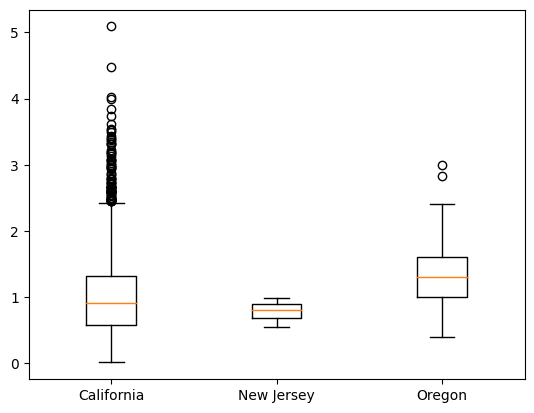

In [28]:

plt.boxplot([cali,newjers,oregon],labels=["California","New Jersey","Oregon"])

### Task 4.2

<BarContainer object of 3605 artists>

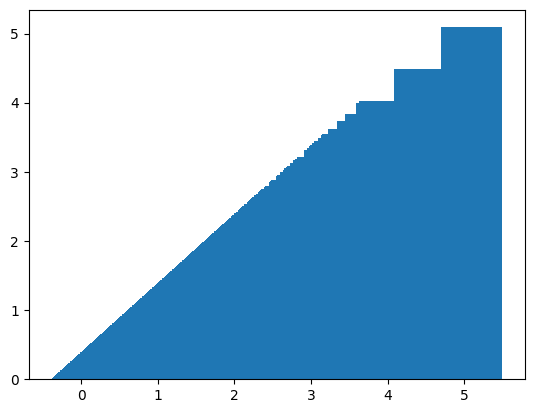

In [29]:
plt.bar(cali,cali)

### Task 4.3

In [30]:
locations = df_earthquake[["location.latitude","location.longitude"]]
locationslist = locations.values.tolist()

In [31]:
earthquake_map = folium.Map(location=[0,0],zoom_start=2,)
for i in range(len(locationslist)):
    folium.RegularPolygonMarker(locationslist[i], fill_color='red',color="red",  number_of_sides=3, radius=3).add_to(earthquake_map)


In [32]:
earthquake_map.save("earthquake_map.html")

### Task 4.4

In [48]:
from folium import plugins
df_datetime64 = df_earthquake
df_datetime64["time.full"] = pd.to_datetime(df_earthquake['time.full'], format='%d/%m/%Y').dt.date

In [70]:
start_day = np.datetime64("2016-07-27")
end_day = np.datetime64("2016-08-25")

days2={}
while start_day <= end_day:
    time = df_datetime64[df_datetime64["time.full"]==start_day]
    time_location_list = time[["location.latitude","location.longitude"]].values.tolist()
    days2[start_day]=time_location_list
    start_day = start_day + np.timedelta64(1,"D")

keys = days2.keys()
heat_data=[]
for i in keys:
    heat_data.append(days2[i])


In [71]:
heat_map_time=folium.Map(location=[0,0],zoom_start=2)
plugins.HeatMapWithTime(heat_data, auto_play=True, max_opacity=0.8).add_to(heat_map_time)
heat_map_time

### Task 4.5

In [46]:
df_earthquake["time.full"]


0       2016-07-27
1       2016-07-27
2       2016-07-27
3       2016-07-27
4       2016-07-27
           ...    
8385    2016-08-25
8386    2016-08-25
8387    2016-08-25
8388    2016-08-25
8389    2016-08-25
Name: time.full, Length: 8390, dtype: object

In [53]:
df_datetime64["time.full"]

0       2016-07-27
1       2016-07-27
2       2016-07-27
3       2016-07-27
4       2016-07-27
           ...    
8385    2016-08-25
8386    2016-08-25
8387    2016-08-25
8388    2016-08-25
8389    2016-08-25
Name: time.full, Length: 8390, dtype: object

In [59]:
np.datetime64("2016-07-27")
start_day = start_day + np.timedelta64(1,"D")
print(start_day)

2016-07-28


In [ ]:
folium.GeoJson(
    "https://raw.githubusercontent.com/fraxen/tectonicplates/master/GeoJSON/PB2002_boundaries.json",
    name='geojson'
).add_to(earthquake_map)